# Ali checkpoint
## exploratory analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import folium as folium

df = pd.read_csv('all_deaths_clean.csv', encoding='utf-8')

In [2]:
#df.head()
print(df.columns)
print(df['cause_short'].unique())

Index(['id', 'state', 'county', 'jail', 'year', 'date_of_death', 'full_name',
       'last_name', 'first_name', 'mid_name', 'suffix', 'date_incarcerated',
       'cause_short', 'cause_detail', 'dob', 'yob', 'age', 'race',
       'race_detail', 'gender', 'custody_status', 'what_info_from_media',
       'num_media_descriptors', 'length_incarceration', 'cause_detail_group'],
      dtype='object')
['m' 's' 'da' 'h' 'ac' nan 'o' 'a' 'u']


In [3]:
# general info about dataset

df_len = len(df)
print("length of df: ", df_len)

print("list of columns: ", df.columns)

# number of non NA vals per col

known_causes = df[df['cause_detail'].notna()]
print("cases where causes of death are known: ", len(known_causes))

known_year = df[df['year'].notna()]
print("cases where year of death is known: ", len(known_year))

known_age = df[df['age'].notna()]
print("cases where age of victim is known: ", len(known_age))

info_media = df[df['what_info_from_media'].notna()]
print(len(info_media))
print(info_media['what_info_from_media'][:10])

length of df:  7571
list of columns:  Index(['id', 'state', 'county', 'jail', 'year', 'date_of_death', 'full_name',
       'last_name', 'first_name', 'mid_name', 'suffix', 'date_incarcerated',
       'cause_short', 'cause_detail', 'dob', 'yob', 'age', 'race',
       'race_detail', 'gender', 'custody_status', 'what_info_from_media',
       'num_media_descriptors', 'length_incarceration', 'cause_detail_group'],
      dtype='object')
cases where causes of death are known:  6097
cases where year of death is known:  7571
cases where age of victim is known:  3325
318
7                      name, age, date of death, race, 
8                                    date of death, age
9                   name, age, race, date of death, cod
10                       name, dob, date of death, race
18    date of death, age, custody status, date of ar...
19                   date of death, age, custody status
20                         age, race, conviction status
22          date of death, age, race, co

In [4]:
# race info

races = df[df['race'].notna()]
print("cases where race is known: ", len(races))
print("unique races: ", races['race'].unique())
count_by_race = races.groupby('race')['id'].count()
print("counts of instances of death grouped by race: ", count_by_race)
race_details = df[df['race_detail'].notna()]
print("cases where race detail is known: ", len(race_details))
print("unique race details: ", race_details['race_detail'].unique())

cases where race is known:  6899
unique races:  ['B' 'W' 'H' 'AI' 'A' 'O' 'PI']
counts of instances of death grouped by race:  race
A       82
AI      72
B     2133
H      879
O       31
PI      11
W     3690
Name: id, dtype: int64
cases where race detail is known:  36
unique race details:  ['Other Asian' 'Asian Indian' 'Korean' 'Vietnamese' 'Filipino' 'Hawaiian'
 'State says W, county says B' 'Chinese' 'Guamanian' 'Bangladeshi'
 'White Hispanic' 'Cuban' 'Liberian' 'Antigua-Barbuda' 'multi-racial']


count of deaths by state:  state
AL      80
AR      71
AZ     195
CA    1221
CO     185
DC      52
FL     739
GA     272
IA      33
ID      40
Name: id, dtype: int64
count of deaths by county:  county
Ada                                                                   11
Adams                                                                 27
Aiken                                                                 11
Alachua                                                               16
Alameda                                                               83
Allegheny                                                             43
Allen                                                                 12
Amelia, Buckingham, Cumberland, Lunenburg, Nottoway, Prince Edward    11
Anderson                                                               5
Androscoggin                                                           4
Name: id, dtype: int64
# of counties:  404
count of deaths by year:  

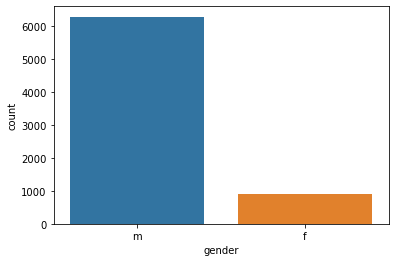

In [5]:
# groupby

states = df.groupby('state')['id'].count()
print("count of deaths by state: ", states[:10])

counties = df.groupby('county')['id'].count()
print("count of deaths by county: ", counties[:10])
print("# of counties: ", len(counties))

years = df.groupby('year')['id'].count()
print("count of deaths by year: ", years)

gender = df.groupby('gender')['id'].count()
print("count of deaths by gender: ", gender)

age = df.groupby('age')['id'].count()
print("count of deaths by age: ", age)
print("max age: ", np.amax(df['age']))
print("min age: ", np.amin(df['age']))
print("avg age: ", np.mean(df['age']))

plt1 = sns.countplot(x=df["gender"])

**cause_short:**	cause of death category (AC: accident; S: suicide; H: homicide; M: illness; DA: acute drugs/alcohol problems; O: other)

## Hypothesis testing:
### Male vs. Female inmates dying by medical complication

In [7]:
# filter and separate our dataframes
df_filt = df[df['cause_short'].notna()]
df_f = df_filt[df_filt['gender']=='f']
df_m = df_filt[df_filt['gender']=='m']

# set up values 

n_f = df_f.shape[0]
n_m = df_m.shape[0]

mu_f = df_f[df_f['cause_short']=='m'].shape[0] / n_f
mu_m = df_m[df_m['cause_short']=='m'].shape[0] / n_m

std_f = np.std(np.where(df_f['cause_short']=='m', 1, 0))
std_m = np.std(np.where(df_m['cause_short']=='m', 1, 0))

# conduct hypothesis test

pval = stats.ttest_ind_from_stats(mu_f, std_f, n_f, mu_m, std_m, n_m)

print("P-value: ", pval[1])

P-value:  0.1617784997420478


First, I filtered the dataframe to include only rows where 'cause_short' is not NA. Then I make separate dataframes for male vs. female inmates. After, I calculated the relevant sample statistics (sample n, sample mean, sample standard deviation). Finally, I conducted an independent t-test. 

$H_0$: The proportion of incarcerated males who died in custody by medical complications is the same as the proportion of incarcerated females who died in custody of medical complications. 

$H_A$: The proportion of incarcerated males who died in custody by medical complications is **NOT** the same as the proportion of incarcerated females who died in custody of medical complications.

Our calculated p-value was 0.162; using a significance level of 0.05, this means that we fail to reject the null hypothesis. There was **insufficient** evidence to claim that there was a significant difference in the proportion of incarcerated males who died in custody by medical complications vs. the proportion of incarcerated females who died in custody by medical complication. 

## Male vs. Female dying by suicide

In [8]:
# ttest

mu_f_s = df_f[df_f['cause_short']=='s'].shape[0] / n_f
mu_m_s = df_m[df_m['cause_short']=='s'].shape[0] / n_m

std_f_s = np.std(np.where(df_f['cause_short']=='s', 1, 0))
std_m_s = np.std(np.where(df_m['cause_short']=='s', 1, 0))

pval = stats.ttest_ind_from_stats(mu_f_s, std_f_s, n_f, mu_m_s, std_m_s, n_m)

print("P-value: ", pval[1])

P-value:  1.0912077967916176e-08


$H_0$: The proportion of incarcerated males who died in custody by suicide is the same as the proportion of incarcerated females who died in custody by suicide. 

$H_A$: The proportion of incarcerated males who died in custody by suicide is **NOT** the same as the proportion of incarcerated females who died in custody by suicide. 

Our calculated p-value was 1.091e-08; using a significance level of 0.05, this means that we CAN reject the null hypothesis. There was **sufficient** evidence to claim that there **IS** a significant difference in the proportion of incarcerated males who died in custody by suicide vs. the proportion of incarcerated females who died in custody by suicide. 

## Confidence interval for proportion of deaths by suicide, grouped by gender

In [9]:
# ci female suicide

scale_f_s = np.sqrt(mu_f_s*(1-mu_f_s)) / np.sqrt(n_f)
ci_f_s = stats.norm.interval(alpha=0.95,loc=(mu_f_s)*100,scale=(scale_f_s)*100)

print("empirical prop female inmates who died by suicide: ", (mu_f_s*100))
print("confidence interval: ", (ci_f_s[0], ci_f_s[1]))

empirical prop female inmates who died by suicide:  21.41176470588235
confidence interval:  (18.65408624087965, 24.169443170885053)


We are 95% confident that the true population proportion of incarcerated females who die by suicide is between 18.65% and 24.17%.

In [10]:
# ci male suicide

scale_m_s = np.sqrt(mu_m_s*(1-mu_m_s)) / np.sqrt(n_m)
ci_m_s = stats.norm.interval(alpha=0.95,loc=(mu_m_s)*100,scale=(scale_m_s)*100)

print("empirical prop female inmates who died by suicide: ", (mu_m_s*100))
print("confidence interval: ", (ci_m_s[0], ci_m_s[1]))

empirical prop female inmates who died by suicide:  30.993354915658543
confidence interval:  (29.810188624683104, 32.17652120663398)


We are 95% confident that the true proportion of incarcerated males who die by suicide is between 29.81% and 32.176%.

# Male vs. Female dying by homicide 

In [11]:
# ttest

mu_f_h = df_f[df_f['cause_short']=='h'].shape[0] / n_f
mu_m_h = df_m[df_m['cause_short']=='h'].shape[0] / n_m

std_f_h = np.std(np.where(df_f['cause_short']=='h', 1, 0))
std_m_h = np.std(np.where(df_m['cause_short']=='h', 1, 0))

pval = stats.ttest_ind_from_stats(mu_f_h, std_f_h, n_f, mu_m_h, std_m_h, n_m)

print("P-value: ", pval[1])

P-value:  5.561132766859688e-07


$H_0$: The proportion of incarcerated males who died in custody by homicide is the same as the proportion of incarcerated females who died in custody by homicide. 

$H_A$: The proportion of incarcerated males who died in custody by homicide is **NOT** the same as the proportion of incarcerated females who died in custody by homicide. 

Our calculated p-value was 5.561e-07; using a significance level of 0.05, this means that we CAN reject the null hypothesis. There was **sufficient** evidence to claim that there **IS** a significant difference in the proportion of incarcerated males who died in custody by homicide vs. the proportion of incarcerated females who died in custody by homicide. 

## Confidence interval for proportion of deaths by homicide, grouped by gender

In [25]:
# ci female homicide
'''
scale_f_h = np.sqrt(mu_f_h*(1-mu_f_h)) / np.sqrt(n_f)
ci_f_h = stats.norm.interval(alpha=0.95,loc=(mu_f_h)*100,scale=(scale_f_h)*100)

print("empirical prop female inmates who died by suicide: ", (mu_f_h*100))
print("confidence interval: ", (ci_f_h[0], ci_f_h[1]))
'''
print('num observations: ', df_f[df_f['cause_short']=='h'].shape[0])

num observations:  2


Above is the code for a confidence interval for the true population proportion of incarcerated females deaths by homicide; however, this is inappropriate, as there are only 2 observations of female inmates dying by homicide in our dataset, which is not enough to calculate a meaningful confidence interval.

In [24]:
# ci male homicide

scale_m_h = np.sqrt(mu_m_h*(1-mu_m_h)) / np.sqrt(n_m)
ci_m_h = stats.norm.interval(alpha=0.95,loc=(mu_m_h)*100,scale=(scale_m_h)*100)

print("empirical prop female inmates who died by suicide: ", (mu_m_h*100))
print("confidence interval: ", (ci_m_h[0], ci_m_h[1]))

print("num observations: ", df_m[df_m['cause_short']=='h'].shape[0])

empirical prop female inmates who died by suicide:  3.3395808485261544
confidence interval:  (2.8799212279783535, 3.7992404690739554)
num observations:  196


We are 95% confident that the true population proportion of incarcerated males who die by homicide is between 2.87% and 3.79%. 

# Male vs. Female dying by accident

In [26]:
print("number of males who died by accident: ", df_m[df_m['cause_short']=='ac'].shape[0])
print("number of females who died by accident: ", df_f[df_f['cause_short']=='ac'].shape[0])

number of males who died by accident:  122
number of females who died by accident:  18


# Male vs. Female dying by acute drug/alcohol problems

In [29]:
# ttest

mu_f_da = df_f[df_f['cause_short']=='da'].shape[0] / n_f
mu_m_da = df_m[df_m['cause_short']=='da'].shape[0] / n_m

std_f_da = np.std(np.where(df_f['cause_short']=='da', 1, 0))
std_m_da = np.std(np.where(df_m['cause_short']=='da', 1, 0))

pval = stats.ttest_ind_from_stats(mu_f_da, std_f_da, n_f, mu_m_da, std_m_da, n_m)

print("P-value: ", pval[1])
print("n_f_da: ", df_f[df_f['cause_short']=='da'].shape[0])
print("n_m_da: ", df_m[df_m['cause_short']=='da'].shape[0])

P-value:  1.0591917485729585e-17
n_f_da:  143
n_m_da:  461


$H_0$: The proportion of incarcerated males who died in custody by acute drug/alcohol related problems is the same as the proportion of incarcerated females who died in custody by acute drug/alcohol related problems. 

$H_A$: The proportion of incarcerated males who died in custody by acute drug/alcohol related problems is **NOT** the same as the proportion of incarcerated females who died in custody by acute drug/alcohol related problems. 

Our calculated p-value was 1.059e-17; using a significance level of 0.05, this means that we CAN reject the null hypothesis. There was **sufficient** evidence to claim that there **IS** a significant difference in the proportion of incarcerated males who died in custody by acute drug/alcohol related problems vs. the proportion of incarcerated females who died in custody by acute drug/alcohol related problems. 

## Confidence interval for proportion of deaths by acute drug/alcohol related problems,  by gender

In [32]:
# ci female da

scale_f_da = np.sqrt(mu_f_da*(1-mu_f_da)) / np.sqrt(n_f)
ci_f_da = stats.norm.interval(alpha=0.95,loc=(mu_f_da)*100,scale=(scale_f_da)*100)

print("empirical prop female inmates who died by acute drug/alcohol problems: ", 
      (mu_f_da*100))
print("confidence interval: ", (ci_f_da[0], ci_f_da[1]))

empirical prop female inmates who died by acute drug/alcohol problems:  16.823529411764707
confidence interval:  (14.308764291416688, 19.338294532112723)


We are 95% confident that the true population proportion of incarcerated females who died by acute drug/alcohol related problems is between 14.309% and 19.338%. 

In [34]:
# ci male da

scale_m_da = np.sqrt(mu_m_da*(1-mu_m_da)) / np.sqrt(n_m)
ci_m_da = stats.norm.interval(alpha=0.95,loc=(mu_m_da)*100,scale=(scale_m_da)*100)

print("empirical prop female inmates who died by acute drug/alcohol problems: ", 
      (mu_m_da*100))
print("confidence interval: ", (ci_m_da[0], ci_m_da[1]))

empirical prop female inmates who died by acute drug/alcohol problems:  7.854830465155905
confidence interval:  (7.166541620393809, 8.543119309918001)


We are 95% confident that the true population proportion of incarcerated males who died by acute drug/alcohol related problems is between 7.167%% and 8.543%. 